<a href="https://colab.research.google.com/github/roseal3tb/IT326/blob/main/Phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Project Goal:
The primary objective of this project is to develop innovative predictive techniques that not only classify patients based on their risk of heart disease using multiple medical indicators but also employ clustering techniques to uncover distinct patient profiles. By integrating these approaches, the project aims to provide healthcare professionals with actionable insights that enhance early detection and personalized prevention strategies, ultimately contributing to improved cardiovascular health outcomes.


# Dataset Source:

The dataset was obtained from kaggle.com https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?resource=download

# Dataset Description:
**Features:**
Data types and numbers of the attirubtes.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


**Number of Objects:** Based on the dataset that was provided, there are 918 rows.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Raw_dataset.csv', sep='\t')
print(f"- Rows (instances): {df.shape[0]}")

- Rows (instances): 918


**Class Distribution:** From our class label (heart disease) there are 410 patients with no heart disease and 508 patients with heart disease.

In [ ]:
print("Target Column (class attribute): HeartDisease")
count_0 = df[df["HeartDisease"] == 0].shape[0]
count_1 = df[df["HeartDisease"] == 1].shape[0]
print(f"- Patients with NO heart disease (0): {count_0}")
print(f"- Patients WITH heart disease (1): {count_1}")

Target Column (class attribute): HeartDisease
- Patients with NO heart disease (0): 410
- Patients WITH heart disease (1): 508


**Dataset Sample:** sample of the raw dataset.

In [ ]:
from tabulate import tabulate
print("\n\033[1mDataset Sample (first 5 rows):\033[0m")
print(tabulate(df.head(), headers="keys", tablefmt="fancy_grid"))


Dataset Sample (first 5 rows):
╒════╤═══════╤═══════╤═════════════════╤═════════════╤═══════════════╤═════════════╤══════════════╤═════════╤══════════════════╤═══════════╤════════════╤════════════════╕
│    │   Age │ Sex   │ ChestPainType   │   RestingBP │   Cholesterol │   FastingBS │ RestingECG   │   MaxHR │ ExerciseAngina   │   Oldpeak │ ST_Slope   │   HeartDisease │
╞════╪═══════╪═══════╪═════════════════╪═════════════╪═══════════════╪═════════════╪══════════════╪═════════╪══════════════════╪═══════════╪════════════╪════════════════╡
│  0 │    40 │ M     │ ATA             │         140 │           289 │           0 │ Normal       │     172 │ N                │       0   │ Up         │              0 │
├────┼───────┼───────┼─────────────────┼─────────────┼───────────────┼─────────────┼──────────────┼─────────┼──────────────────┼───────────┼────────────┼────────────────┤
│  1 │    49 │ F     │ NAP             │         160 │           180 │           0 │ Normal       │     156 │ N  

# Phase 2:

# **Q1-Data Analysis**

**Statistic summery:**

In [20]:
import pandas as pd
df = pd.read_csv('/content/sample_data/Raw_dataset.csv', sep=',')
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000




The statistical summary provides an overview of the dataset including mean, standard deviation, minimum, and maximum values. This helps in understanding the central tendency and spread of the numeric attributes.

# **2. Missing Values Analysis**



Missing Values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Text(0, 0.5, 'Number of Missing Values')

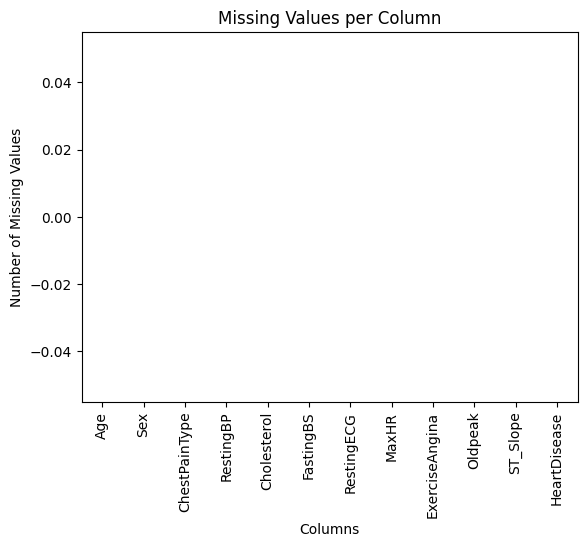

In [23]:
import matplotlib.pyplot as plt
missing = df.isnull().sum()
print("\nMissing Values:")
print(missing)

plt.figure()
missing.plot(kind='bar')
plt.title("Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")

The missing values analysis shows that there are no missing values in the dataset. Therefore, no imputation is required during preprocessing.

# **4. Histogram (distribution)**

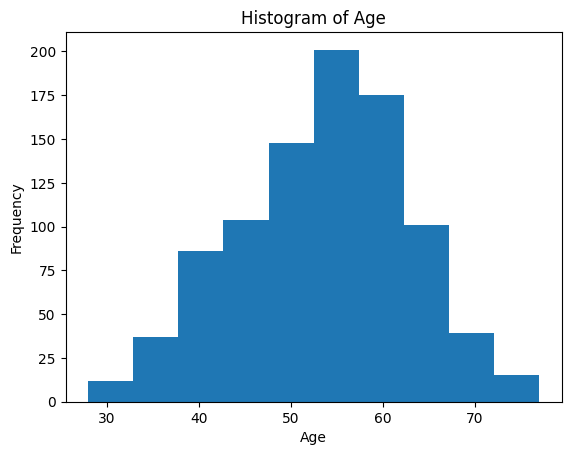

In [26]:
plt.figure()
plt.hist(df['Age'])
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()



The histogram of Age shows the distribution of patients’ ages. The data appears moderately distributed around the middle age group, which helps in understanding the overall data spread and whether normalization may be needed.

# **4. Histogram (distribution)**

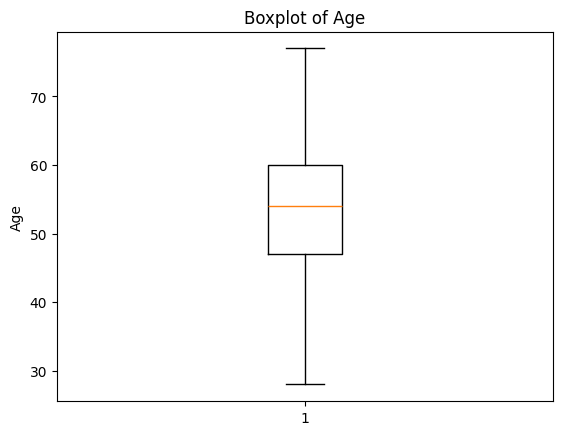

In [27]:
plt.figure()
plt.boxplot(df['Age'])
plt.title("Boxplot of Age")
plt.ylabel("Age")
plt.show()


The scatter plot between Age and RestingBP shows the relationship between the two variables. The plot indicates a weak correlation, suggesting that feature relationships should be further analyzed during preprocessing.

# **6. Scatter plot**

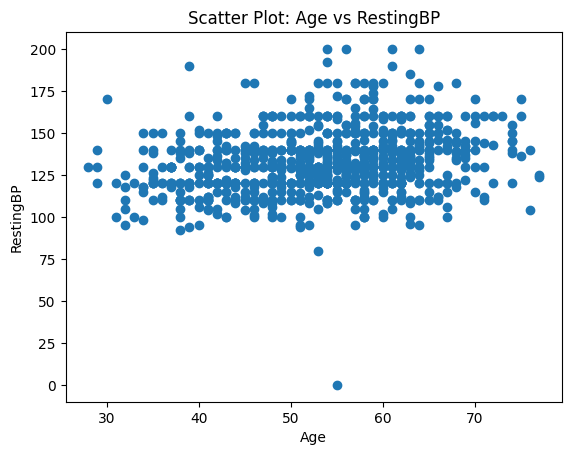

In [29]:
plt.figure()
plt.scatter(df['Age'], df['RestingBP'])
plt.title("Scatter Plot: Age vs RestingBP")
plt.xlabel("Age")
plt.ylabel("RestingBP")
plt.show()




The scatter plot between Age and RestingBP shows the relationship between the two variables. The plot indicates a weak correlation, suggesting that feature relationships should be further analyzed during preprocessing.

# **7. Class label distribution**

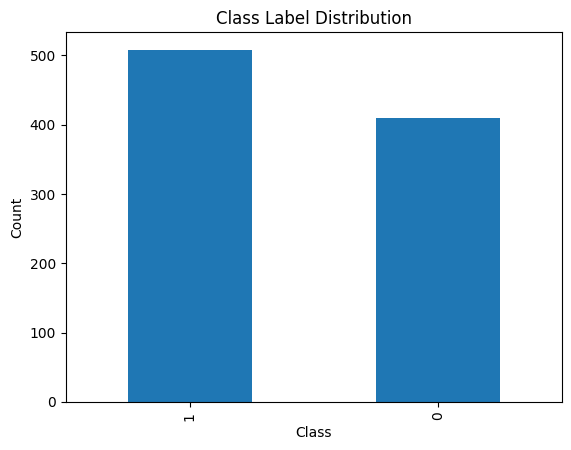

In [30]:
plt.figure()
df['HeartDisease'].value_counts().plot(kind='bar')
plt.title("Class Label Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()



The class label distribution shows a slight imbalance between heart disease cases and non-cases. This suggests that resampling techniques may be considered during preprocessing to avoid model bias.



Based on the exploratory data analysis, the dataset is relatively clean with no missing values. However, the presence of outliers in some numerical features and slight class imbalance indicates that preprocessing steps such as outlier handling, feature scaling, and possible resampling may improve model performance.